<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-первичная-оценка-данных" data-toc-modified-id="Загрузка-и-первичная-оценка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и первичная оценка данных</a></span></li><li><span><a href="#Предварительный-анализ-данных" data-toc-modified-id="Предварительный-анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предварительный анализ данных</a></span></li><li><span><a href="#Краткий-исследовательский-анализ-данных" data-toc-modified-id="Краткий-исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Краткий исследовательский анализ данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# [Дашборд](https://datalens.yandex/l513o2az9iwca) "Все получится!"

## Загрузка и первичная оценка данных

**Цель исследования:** создать интерактивный дашборд, который отображает динамику и структуру трудоустройств в рамках программы "Все получится!" [благотворительного фонда "Рауль"](https://raoul.spb.ru/). Важно, чтобы дашбордом было легко и удобно пользоваться всем сотрудникам фонда (независимо от их уровня владения компьютером).

[Ссылка](https://datalens.yandex.ru/l513o2az9iwca-vse-poluchitsya) на получившийся дашборд.

Параметры динамики: 
- помесячно, 
- поквартально, 
- ежегодно.

Параметры структуры: 
- принадлежность благополучателя к одному из сегментов, 
- ответственная НКО, 
- регион, 
- пол благополучателя, 
- возраст, 
- тип трудоустройства (временное, постоянное с сопровождением, постоянное без сопровождения), 
- тип работодателя (внутренняя защищённая площадка, внешняя защищённая площадка, открытый рынок).

Параметры трудоустройства: 
- от 1 дня, 
- от 1 месяца.

Back-end дэшборда можно редактировать без привлечения внешних специалистов (например, этим может заниматься специалист по мониторингу и оценке).

**Входные данные:** компиляция рабочих таблиц, собранных в одной гугл-таблице, которая в дальнейшем будет регулярно  обновляться сотрудниками фонда.

**План работы:** 
- загрузить даннные,
- получить общую характеристику данных: сколько строк, какие показатели и значения, есть ли пропуски, дубликаты и аномалии,
- провести краткий исследовательский анализ данных,
- сделать вывод по результатам анализа,
- создать дашборд по ТЗ заказчика. 

In [1]:
# сразу загрузим все необходимые библиотеки
import pandas as pd
import datetime as dt
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import warnings
import plotly.graph_objects as go
import plotly.express as px
import math as mth
import seaborn as sns

In [2]:
# Установим библиотеку для чтения 
# pip install xlrd

Исходные данные собраны в таблице [на Яндекс.Диске](https://disk.yandex.ru/i/KeSNZWlrtWCHFQ) или в [гугл-форме](https://docs.google.com/spreadsheets/d/1f0EJA_yTduHFC7EFroPLfpZXS-ikRuW2SXmgkdu_iro/edit?usp=sharing).

In [3]:
# загружаем основные данные
data = pd.read_excel('БФРауль_Данные_по_трудоустроенным.xls')

Посмотрим основную информацию по доступным данным. 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 16 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Unnamed: 0                                259 non-null    int64         
 1   id_кандидата                              259 non-null    int64         
 2   пол                                       259 non-null    object        
 3   возраст                                   259 non-null    int64         
 4   дата_добавления                           258 non-null    datetime64[ns]
 5   инвалидность                              259 non-null    object        
 6   сиротский_опыт                            259 non-null    object        
 7   адаптированная_образовательная_программа  259 non-null    object        
 8   начало_трудоустройства                    259 non-null    datetime64[ns]
 9   завершение_трудоустройства      

В таблице 259 записей, есть по одному пропуску в дате добавления, типах площадки, трудоустройства, опыте работы. Далее посмотрим в одной ли строке эти пропуски или в разных. Много пропусков в столбце *завершение трудоустройства*, скорее всего, для тех подопечных, которые просто еще работают.  

Посмотрим на саму таблицу, выгрузив первые 5 строк. 

In [5]:
data.head()

,Unnamed: 0,id_кандидата,пол,возраст,дата_добавления,инвалидность,сиротский_опыт,адаптированная_образовательная_программа,начало_трудоустройства,завершение_трудоустройства,1+_месяц_работы,тип_площадки,тип_трудоустройства,тип_опыта_работы,регион_код,провайдер_код
0,0,1,Женский,25,2018-12-06,ИСТИНА,ЛОЖЬ,ЛОЖЬ,2023-01-16,NaT,ИСТИНА,Внешняя,Открытый рынок без сопровождения,Повторный,reg200,prov3500
1,1,2,Мужской,28,2021-09-22,ИСТИНА,ЛОЖЬ,ЛОЖЬ,2023-01-09,NaT,ИСТИНА,Внешняя,Открытый рынок с сопровождением,Повторный,reg200,prov3500
2,2,3,Женский,31,2016-07-08,ИСТИНА,ЛОЖЬ,ЛОЖЬ,2023-04-18,2023-06-30,ИСТИНА,Внешняя,Открытый рынок без сопровождения,Повторный,reg200,prov3500
3,3,4,Мужской,34,2022-10-07,ИСТИНА,ЛОЖЬ,ЛОЖЬ,2022-11-21,2022-12-30,ИСТИНА,Внешняя,Открытый рынок без сопровождения,Повторный,reg200,prov3500
4,4,4,Мужской,34,2022-10-07,ИСТИНА,ЛОЖЬ,ЛОЖЬ,2023-03-22,2023-03-30,ЛОЖЬ,Внешняя,Открытый рынок без сопровождения,Повторный,reg200,prov3500


Уберем из датасета ненужный столбец 'Unnamed: 0'.

In [27]:
del data['Unnamed: 0']

Проверим количество пропусков в данных.

In [28]:
pd.DataFrame(round((data.isna().mean()*100))).style.background_gradient('coolwarm')

,0
id_кандидата,0.000000
пол,0.000000
возраст,0.000000
дата_добавления,0.000000
инвалидность,0.000000
сиротский_опыт,0.000000
адаптированная_образовательная_программа,0.000000
начало_трудоустройства,0.000000
завершение_трудоустройства,67.000000
1+_месяц_работы,0.000000


Проверим наличие полных дубликатов в данных.

In [21]:
# Подсчет количества дубликатов
num_duplicates = data.duplicated().sum()

# Вывод количества дубликатов
print("Количество дубликатов:", num_duplicates)

Количество дубликатов: 0


Отлично, дубликатов нет. 

Таким образом, в датасете представлены данные о 259 подопечных. Пропуски есть только в столбце "завершение_трудоустройства", что логично, ведь большинство подопечных продолжает работать. 

## Предварительный анализ данных
Выведем количество уникальных значений и сами уникальные значения для некоторых столбцов, чтобы убедиться в том, что все данные введены корректно, в правильных категориях.

In [22]:
# Цикл по столбцам датасета
for column in data.columns:
    # Вывод количества уникальных значений в текущем столбце
    num_unique_values = data[column].nunique()
    print(f"Уникальные значения в столбце '{column}': {num_unique_values}")

Уникальные значения в столбце 'Unnamed: 0': 259
Уникальные значения в столбце 'id_кандидата': 242
Уникальные значения в столбце 'пол': 2
Уникальные значения в столбце 'возраст': 23
Уникальные значения в столбце 'дата_добавления': 173
Уникальные значения в столбце 'инвалидность': 2
Уникальные значения в столбце 'сиротский_опыт': 2
Уникальные значения в столбце 'адаптированная_образовательная_программа': 2
Уникальные значения в столбце 'начало_трудоустройства': 123
Уникальные значения в столбце 'завершение_трудоустройства': 35
Уникальные значения в столбце '1+_месяц_работы': 2
Уникальные значения в столбце 'тип_площадки': 2
Уникальные значения в столбце 'тип_трудоустройства': 3
Уникальные значения в столбце 'тип_опыта_работы': 2
Уникальные значения в столбце 'регион_код': 9
Уникальные значения в столбце 'провайдер_код': 8


Отметим, что уникальных id кандидатов меньше, чем записей всего. То есть некоторые подопечные участвовали в программе не один раз. 

In [25]:
# Список столбцов для выбора уникальных значений
selected_columns = ['пол', 'инвалидность', 'сиротский_опыт', 'адаптированная_образовательная_программа', 
                   '1+_месяц_работы', 'тип_площадки', 'тип_трудоустройства', 'тип_опыта_работы', 
                   'регион_код', 'провайдер_код']

# Выборка уникальных значений в выбранных столбцах и вывод
for column in selected_columns:
    unique_values = data[column].unique()
    print(f"Уникальные значения в столбце '{column}':")
    for value in unique_values:
        print(value)
    print("\n")

Уникальные значения в столбце 'пол':
Женский
Мужской


Уникальные значения в столбце 'инвалидность':
ИСТИНА
ЛОЖЬ


Уникальные значения в столбце 'сиротский_опыт':
ЛОЖЬ
ИСТИНА


Уникальные значения в столбце 'адаптированная_образовательная_программа':
ЛОЖЬ
ИСТИНА


Уникальные значения в столбце '1+_месяц_работы':
ИСТИНА
ЛОЖЬ


Уникальные значения в столбце 'тип_площадки':
Внешняя
Внутренняя
nan


Уникальные значения в столбце 'тип_трудоустройства':
Открытый рынок без сопровождения
Открытый рынок с сопровождением
Временное трудоустройство
nan


Уникальные значения в столбце 'тип_опыта_работы':
Повторный
Первый
nan


Уникальные значения в столбце 'регион_код':
reg200
reg201
reg203
reg204
reg205
reg206
reg207
reg208
reg209


Уникальные значения в столбце 'провайдер_код':
prov3500
prov3501
prov3502
prov3503
prov3504
prov3505
prov3506
prov3507




<div class="alert-info" style="padding: 20px; border-radius: 10px">
<b>💎 Комментарий ревьюера</b>

Для однотипных операций лучше использовать цикл.
    
Также можно уточнить, что означает признак "'1+_месяц_работы'".

Отметим, что в таблице указаны только 2 пола (мужской и женский). 

Параметры наличия инвалидности, сиротского опыта, адаптированной образовательной программы, 1+ месяц работы указаны булевыми значениями "истина" и "ложь". Признак "1+месяц работы" означает, что подопечный уже отработал более одного месяца.

Площадки есть *внешние* и *внутренние*. 

Типы трудоустройства: 'Открытый рынок без сопровождения' 'Открытый рынок с сопровождением', 'Временное трудоустройство'. 

Типы опыта работы: 'Повторный' 'Первый'. Регионы и провайдеры зашифрованы, первых всего 9, вторых – 8 штук.

Оценим разброс по датам: за какой период доступны данные по программе.

In [8]:
# узнаем период добавления новых участников программы
print(data['дата_добавления'].min())
print(data['дата_добавления'].max())

2016-07-08 00:00:00
2023-08-24 00:00:00


Отобразим распределение дат добавления участников программы на гистограмме. 

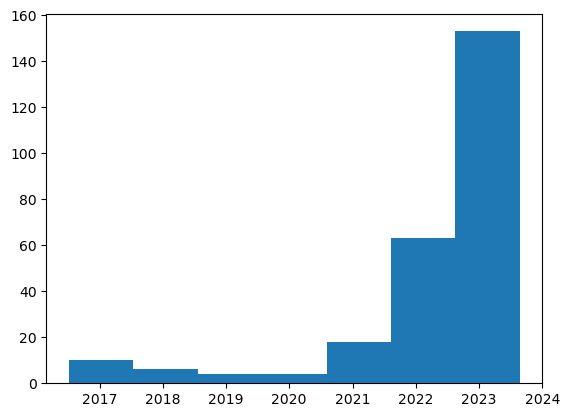

In [32]:
plt.hist(data['дата_добавления'], bins=7);

Участников добавляли с 2016 года, но их наибольшее количество было добавлено после 2022 года. 

Посмотрим на даты трудоустройства. 

In [9]:
# найдем самые ранние и поздние даты начала трудоустройства
print(data['начало_трудоустройства'].min())
print(data['начало_трудоустройства'].max())

2022-11-01 00:00:00
2023-08-29 00:00:00


In [10]:
# найдем самые ранние и поздние даты конца трудоустройства
print(data['завершение_трудоустройства'].min())
print(data['завершение_трудоустройства'].max())

2022-12-30 00:00:00
2023-08-31 00:00:00


Несмотря на добавление участников еще в 2016 году (данные доступны за период добавления новых участников программы от 8 июля 2016 года до 24 августа 2023 года), трудоустройство приходится только на 2022-2023 годы (с ноября 2022 года по 31 августа 2023 года).

Теперь изучим пропуски в данных. Выведем строки с пропусками в дате добавления и типе площадки. 

In [44]:
data[data['дата_добавления'].isnull()]

,id_кандидата,пол,возраст,дата_добавления,инвалидность,сиротский_опыт,адаптированная_образовательная_программа,начало_трудоустройства,завершение_трудоустройства,1+_месяц_работы,тип_площадки,тип_трудоустройства,тип_опыта_работы,регион_код,провайдер_код
226,213,Мужской,17,NaT,ЛОЖЬ,ИСТИНА,ЛОЖЬ,2023-08-01,NaT,ИСТИНА,Внешняя,Временное трудоустройство,Первый,reg204,prov3504


In [45]:
data[data['тип_площадки'].isnull()]

,id_кандидата,пол,возраст,дата_добавления,инвалидность,сиротский_опыт,адаптированная_образовательная_программа,начало_трудоустройства,завершение_трудоустройства,1+_месяц_работы,тип_площадки,тип_трудоустройства,тип_опыта_работы,регион_код,провайдер_код
209,197,Женский,19,2021-05-01,ЛОЖЬ,ИСТИНА,ЛОЖЬ,2023-08-01,NaT,ИСТИНА,NaN,NaN,NaN,reg204,prov3504


Для участника с id 213 не указана дата добавления. 

У участника с id 197 не указаны значения типа площадки, трудоустройства и опыта работы, хотя человек приступил к работе.

In [46]:
data[data['начало_трудоустройства'].isnull()]

,id_кандидата,пол,возраст,дата_добавления,инвалидность,сиротский_опыт,адаптированная_образовательная_программа,начало_трудоустройства,завершение_трудоустройства,1+_месяц_работы,тип_площадки,тип_трудоустройства,тип_опыта_работы,регион_код,провайдер_код


Все участники в таблице трудоустроены. 

In [14]:
data['id_кандидата'].nunique()

242

В таблице содержатся данные о 242 участниках, хотя всего строк 259. Значит 17 человек трудоустроены повторно. Проверим, так ли это. 

In [15]:
data[data['тип_опыта_работы'] == 'Повторный']['id_кандидата'].count()

69

В таблице 69 записей с повторным опытом работы. Проверим, сколько таких участников (посчитаем только уникальные id).

In [16]:
data[data['тип_опыта_работы'] == 'Повторный']['id_кандидата'].nunique()

63

Записей 69, а людей – 63. Возможно, некоторые участники были трудоустроены ранее в других программах, поэтому здесь они записаны, как устроенные "повторно", даже если в исходной таблице о них нет более ранних записей. 

## Краткий исследовательский анализ данных

Проведем небольшой исследовательский анализ данных. Например, рассмотрим возрастной, гендерный состав, а также посмотрим распределение данных в количественных и категориальных признаках пользователей.

Мы знаем, что в датасете дублируется информация о подопечных. Поэтому для анализа создадим второй датасет `cleaned_data` с уникальными id подопечных, чтобы ни один человек не был учтен дважды. При удалении дубликатов оставим самые релевантные строки – то есть те, где наиболее поздняя дата трудоустройства. 

In [49]:
# Создаем новый датасет с уникальными id кандидатов
cleaned_data = data.sort_values(by='начало_трудоустройства').drop_duplicates(subset=['id_кандидата'], 
                                                                             keep='last')
cleaned_data.head()

,id_кандидата,пол,возраст,дата_добавления,инвалидность,сиротский_опыт,адаптированная_образовательная_программа,начало_трудоустройства,завершение_трудоустройства,1+_месяц_работы,тип_площадки,тип_трудоустройства,тип_опыта_работы,регион_код,провайдер_код
18,17,Мужской,21,2022-05-30,ИСТИНА,ЛОЖЬ,ИСТИНА,2022-11-01,NaT,ИСТИНА,Внешняя,Временное трудоустройство,Повторный,reg200,prov3500
52,49,Мужской,28,2017-02-22,ИСТИНА,ЛОЖЬ,ЛОЖЬ,2022-11-01,NaT,ИСТИНА,Внешняя,Открытый рынок без сопровождения,Повторный,reg200,prov3500
74,70,Мужской,29,2016-07-19,ИСТИНА,ЛОЖЬ,ИСТИНА,2022-11-02,NaT,ИСТИНА,Внешняя,Открытый рынок с сопровождением,Повторный,reg200,prov3500
53,50,Мужской,19,2022-04-18,ИСТИНА,ЛОЖЬ,ИСТИНА,2022-11-07,2022-12-31,ИСТИНА,Внешняя,Временное трудоустройство,Первый,reg200,prov3500
115,110,Мужской,22,2022-07-12,ЛОЖЬ,ЛОЖЬ,ИСТИНА,2022-11-15,NaT,ИСТИНА,Внешняя,Временное трудоустройство,Первый,reg200,prov3500


Начнем анализ с изучения распределения подопечных по возрасту.

In [56]:
print(f"Самому младшему участнику {data['возраст'].min()} лет, а самому старшему – {data['возраст'].max()} лет.")

Самому младшему участнику 14 лет, а самому старшему – 39 лет.


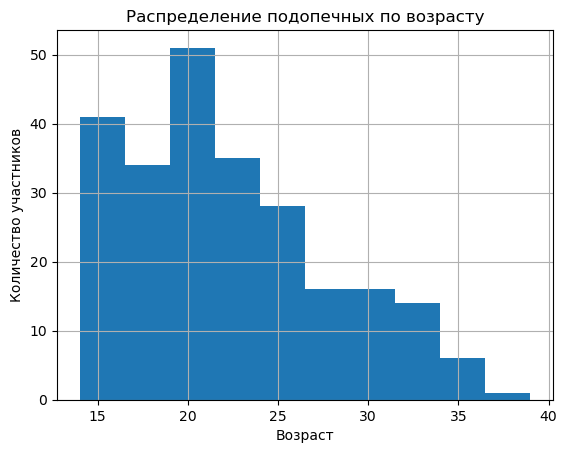

In [53]:
# Распределение по возрасту
cleaned_data['возраст'].hist()
plt.title('Распределение подопечных по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Количество участников');

Участникам программы от 14 до 39 лет. Больше части подопечных еще нет 25 лет. То есть, в основном, проект ориентирован на молодежь. 

На круговых диаграммах отобразим признаки, у которых только два значения. 

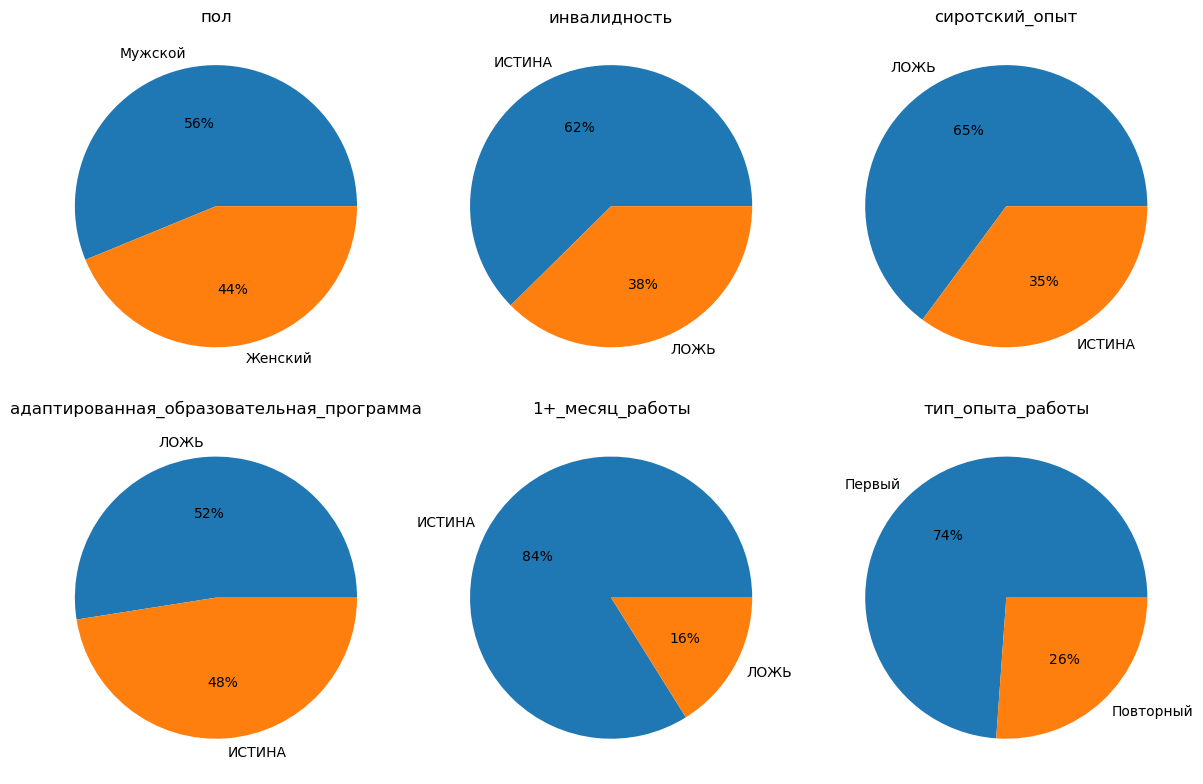

In [66]:
# Список столбцов, для которых нужно построить круговые диаграммы
columns_to_plot = ['пол', 'инвалидность', 'сиротский_опыт', 
                   'адаптированная_образовательная_программа',
                  '1+_месяц_работы', 'тип_опыта_работы']

# Задайте размер фигуры
plt.figure(figsize=(12, 8))

# Переберите столбцы и постройте для каждого круговую диаграмму
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, len(columns_to_plot)//2, i)
    plt.pie(cleaned_data[column].value_counts(), 
            labels=cleaned_data[column].value_counts().index, 
            autopct='%1.0f%%')
    plt.title(column)

# Выведите графики
plt.tight_layout()
plt.show()


Таким образом, в программе немного больше мужчин (56%), чем женщин (44%). Больше чем у половины (а именно у 62%) участников есть инвалидность, у 65% – сиротский опыт. 

Адаптированную образовательную программу прошли 52% участников. Больше месяца уже отработали 84% подопечных – отличный результат! У четверти подопечных (26%) это повторный тип опыта работы. 

Более подробно рассмотрим характеристики самого трудоустройства (тип площадки, трудоустройства). Названия регионов и НКО закодированы в коды ("регион_код" и "провайдер_код", соответственно). Тут нам важны все трудоустройства, в том числе повторные. Так что снова обращается к нашему исходному датасету `data`.

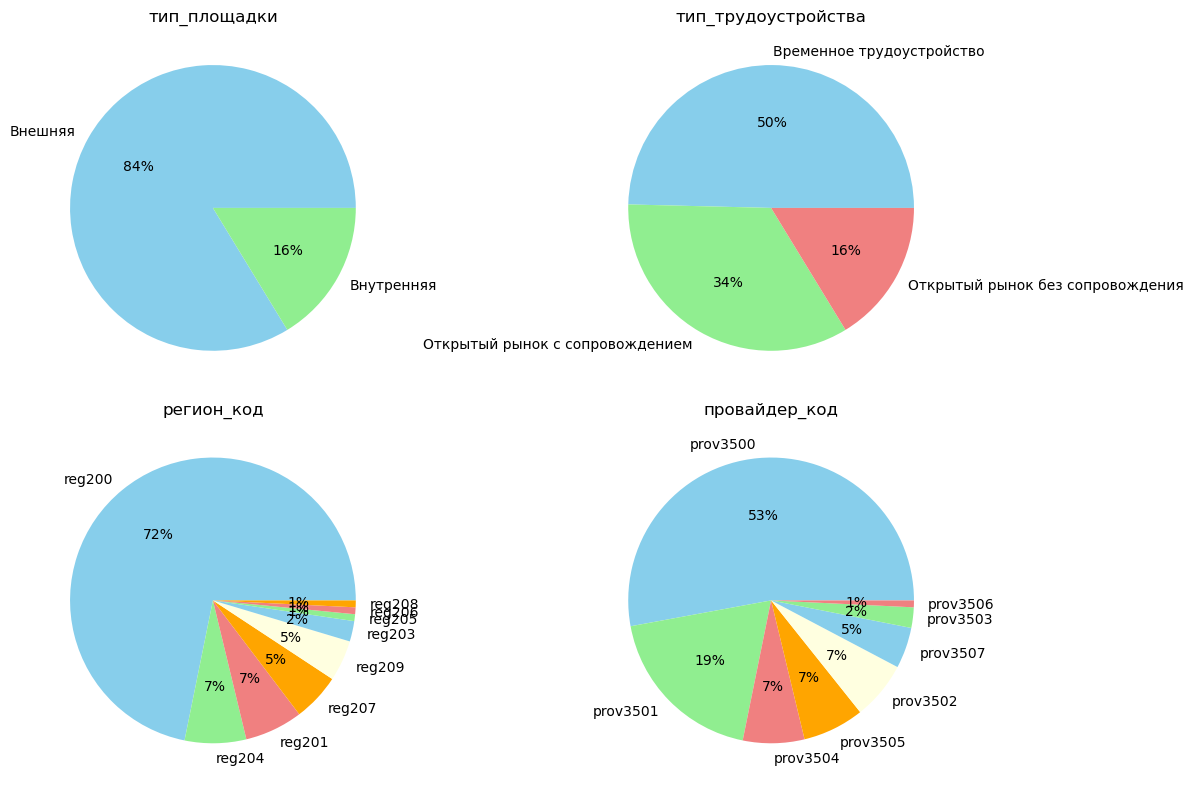

In [68]:
# Список столбцов, для которых нужно построить круговые диаграммы
columns_to_plot = ['тип_площадки', 'тип_трудоустройства', 'регион_код', 'провайдер_код']

# Задайте размер фигуры
plt.figure(figsize=(12, 8))

# Список цветов для круговых диаграмм
colors = ['skyblue', 'lightgreen', 'lightcoral', 'orange', 'lightyellow']

# Переберите столбцы и постройте для каждого круговую диаграмму
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, len(columns_to_plot)//2, i)
    plt.pie(data[column].value_counts(), 
            labels=data[column].value_counts().index, 
            autopct='%1.0f%%', colors=colors)
    plt.title(column)

# Выведите графики
plt.tight_layout()
plt.show()


В 84% трудоустройства произошли на внешней площадке. Ровно половина трудоустройств – временные, еще 34% – на открытом рынке с сопровождением и 10% без сопровождения. 

Сразу отметим, что есть явные лидеры среди регионов и провайдеров, а есть те, которые занимают совсем небольшую долю трудоустройств. Последние можно в дальнейшем при отображении на дашборде объединить в категорию "Другие", чтобы круговая диаграмма удобно читалась. 

Итак, среди регионов 72% занимает регион под кодом reg200, остальные занимают лишь 28%. Среди НКО лидирует prov3500, обеспечивая половину трудоустройств. Почти 20% еще занимает НКО prov3501.

## Вывод
Таким образом, доступно всего 259 записей для 242 участников программы. В данных почти нет пропусков и строго введены значения (категории, булевы значения). В целом, данные готовы для построения дашборда. Небольшая обработка для удобства работы с данными будет проведена инструментами DataLens.